## Bayesian Classifier

- This is a problem of categorizing data. 
- That is the desired response is a discrete variable taking a finite set of values.
    - Suppose you are given the performance of a student in say, Mathematics, out of two subjects, how accurately can you predict final overall grade. (Assume there are 4 grades A,B,C,D)
        - In this case  the grade is the category and mathematics marks is the data given to you.

- You might be wrong with your prediction
- Let us try to make a prediction such that the **probability of going wrong is as low as possible**.

- We are given an observation $x$ which is coming from a class (population) $\pi_1$ or $\pi_2$
- Assume that $x = (x_1,x_2,x_3,\cdots,x_m) \in \Re^m $
- We assume that the two classes have probabilities $q_1$ and $q_2$ respectively ($q_1+q_2 = 1)$.
- Another assumption is that the distribution of $x$ in classes are also known, denoted by $p_1(x)$ and $p_2(x)$   respectively.

- A statistical decision essentially divides $\Re^m$ into two regions $R_1$ and $R_2$.
- If an observation falls in $R_1$ the procedure assigns it to class $\pi_1$ 
- If an observation falls in $R_2$ the procedure assigns it to class $\pi_2$ 

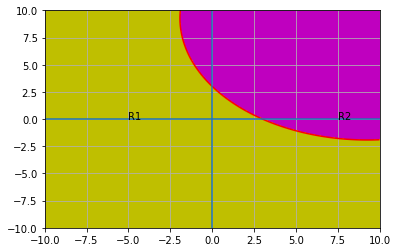

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def p1(x,y):
    power = ((x+5)*(x+5) + (y+5)*(y+5))*0.15
    return np.exp(-power)

def p2(x,y):
    power = ((x-5)*(x-5) + (y-5)*(y-5))*0.5
    return np.exp(-power)

xl = np.linspace(-10,10,1000)
yl = np.linspace(-10,10,1000)
x,y = np.meshgrid(xl,yl)

z = 0.25*p1(x,y) - 0.75*p2(x,y)
zl = np.zeros_like(z, dtype = int)
zl[z>0] = 1;zl[z<0] = -1
cp = plt.contour(x,y,z, levels = [0], colors = ('r'))
plt.contourf(x,y,zl,colors=('m','y'))
plt.annotate("R1",xy=(-5,0))
plt.annotate("R2",xy=(7.5,0))
plt.axvline(x=0)
plt.axhline(y=0)
plt.grid(True)
plt.show()

- **Bayes Decision Rule**
- Assign x to $ \pi_1 $ if $P(\pi_1 \vert x) > P(\pi_2 \vert x)$ and vice versa
- The boundary that divides the input space is determined by solving 
     - $q_1 p_1(x) = q_2 p_2(x) $

#### Probability of Error 
- There are two types of errors
- An observation belonging to class $\pi_1$ getting classified as $\pi_2$ and vice versa.
- Let us call the first type of error $E_{21}$ and the second type $E_{12}$.


- $P(E_{21}) = Prob\{ x \in R_2 \& \; \pi(x) = \pi_1\}\\
      =  Prob\{ x \in R_2 \vert  \pi(x) = \pi_1\}Prob\{\pi(x) = \pi_1 \} \\
      = \int_{R_2} p_1(x)q_1 dx$
- Similarly
- $P(E_{12}) = Prob\{ x \in R_1 \& \; \pi(x) = \pi_2\}\\
      =  Prob\{ x \in R_1 \vert  \pi(x) = \pi_2\}Prob\{\pi(x) = \pi_2 \} \\
      = \int_{R_1} p_2(x)q_2 dx$

- Therefore the probability of error:
- $P(E) = P(E_{12})+P(E_{21}) \\ = \int_{R_2} p_1(x)q_1 dx + \int_{R_1} p_2(x)q_2 dx $

- Everything in the above equation is constant except for $R_1$ and $R_2$
- Bayes Decision is to find $R_1$ and $R_2$ such that $P(E)$ is minimized.
- Let us go back to $P(E)$ to figure out a way of choosing the regions.


- $P(E) = \int_{R_2} p_1(x)q_1 dx + \int_{R_1} p_2(x)q_2 dx \\
        = q_1 - \int_{R_1} p_1(x)q_1 dx + \int_{R_1} p_2(x)q_2 dx \\
        = q_1 + (\int_{R_1} p_2(x)q_2 dx- \int_{R_1} p_1(x)q_1 dx)  \\
        = q_1 + \int_{R_1}( p_2(x)q_2 -  p_1(x)q_1 )dx $

- Since the first term above is a constant the way to minimize $P(E)$ is to choose $R_1$ such that 
  $ p_2(x)q_2 -  p_1(x)q_1$ is always negative. That is,
- $ p_2(x)q_2 <  p_1(x)q_1$
- And this implies :
- $P(\pi_1 \vert x) > P(\pi_1 \vert x)$